<a href="https://colab.research.google.com/github/Sujal261/Digit_recognition_In_Pytorch/blob/main/digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


In [ ]:
from torchvision import datasets
train_data = datasets.MNIST(
    root="data",
    train = True ,
    download = True ,
    transform = ToTensor(),
    target_transform = None
)
test_data= datasets.MNIST(
    root="data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform=None
)

In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
image.shape

torch.Size([1, 28, 28])

In [ ]:
classes = train_data.classes
classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

Image shape is :torch.Size([1, 28, 28])


(-0.5, 27.5, 27.5, -0.5)

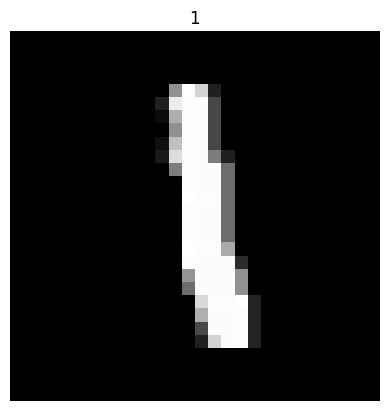

In [ ]:
import matplotlib.pyplot as plt
image,label = train_data[6]
print(f"Image shape is :{image.shape}")
plt.imshow(image.squeeze(), cmap = "gray")
plt.title(label)
plt.axis(False)

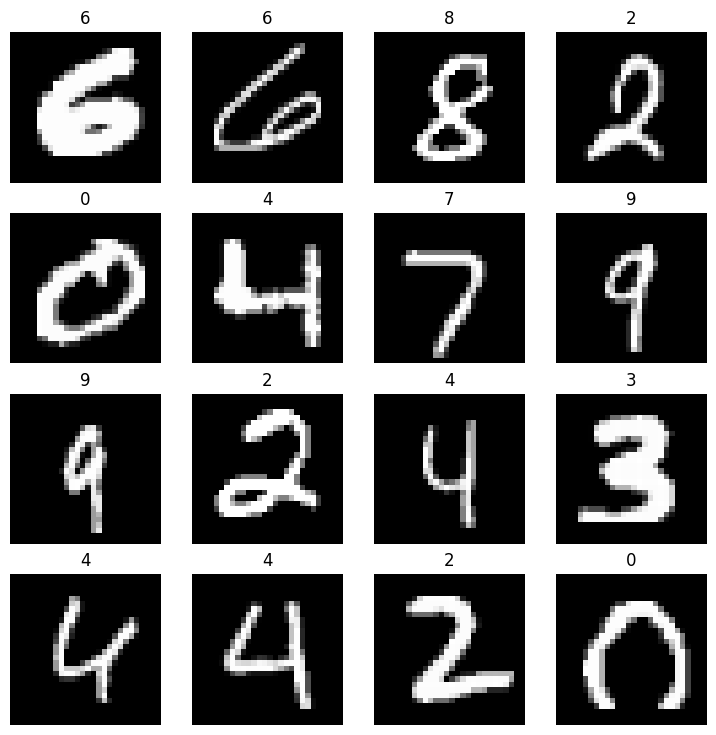

In [ ]:
torch.manual_seed(42)
plt.figure(figsize = (9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label =  train_data[random_idx]
  plt.subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap ="gray")
  plt.title(label)
  plt.axis(False)

In [ ]:
img.shape
img.squeeze().shape

torch.Size([28, 28])

In [ ]:
#making batches out of datset to trainthe model
from torch.utils.data import DataLoader

Batch_size=32

train_dataloader = DataLoader(train_data, batch_size = Batch_size, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size= Batch_size, shuffle = False)

In [ ]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [ ]:
train_features, train_labels = next(iter(train_dataloader))
train_features, train_labels


(tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

(-0.5, 27.5, 27.5, -0.5)

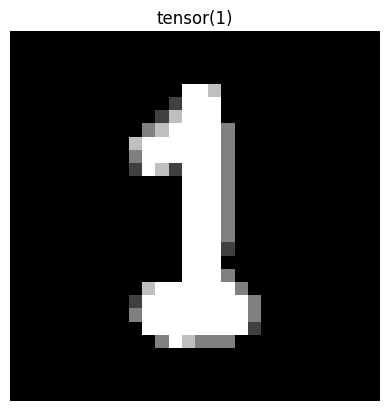

In [ ]:
torch.manual_seed(42)
random_idx=torch.randint(1, len(train_features), size=[1]).item()
image, label = train_features[random_idx], train_labels[random_idx]
plt.imshow(image.squeeze(), cmap= "gray")
plt.title(label)
plt.axis(False)

In [ ]:
image.shape, train_features.shape, train_features[0].shape

(torch.Size([1, 28, 28]), torch.Size([32, 1, 28, 28]), torch.Size([1, 28, 28]))

In [ ]:
device ="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
#Creating a model
class MNIST(nn.Module):
  def __init__(self,input_shape = int , hidden_units = int , output_shape = int):
    super().__init__()
    self.layer_stack1= nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
         out_channels= hidden_units,
        kernel_size = 3,
        stride = 1,
        padding = 1),

        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels= hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )
    # self.layer_stack2 = nn.Sequential(
    #     nn.Conv2d(in_channels = hidden_units,
    #               out_channels = hidden_units,
    #               kernel_size = 3,
    #               stride = 1,
    #               padding = 1),
    #     nn.ReLU(),
    #     nn.Conv2d(
    #         in_channels= hidden_units,
    #         out_channels = hidden_units,
    #         kernel_size =3 ,
    #         stride = 1,
    #         padding =1
    #     ),
    #     nn.ReLU(),
    #     nn.MaxPool2d(kernel_size = 2)
    # )
    self.classifier = nn.Sequential(
       nn.Flatten(),
       nn.Linear(in_features = 1960,
                 out_features = output_shape)
    )
  def forward(self, x):
    x= self.layer_stack1(x)
    #print(f"{x.shape}")
    #x = self.layer_stack2(x)
   # print(f"{x.shape}")
    x = self.classifier(x)
    return x


In [ ]:
class_names = train_data.classes

In [ ]:
torch.manual_seed(42)
model_0= MNIST(input_shape = 1, hidden_units = 10, output_shape = 10).to(device)

In [ ]:
random_image_tensor=torch.rand(size=(1,28,28)).to(device)
random_image_tensor

tensor([[[9.6179e-01, 1.7197e-01, 2.5640e-03, 6.5146e-01, 7.9572e-02,
          3.5752e-01, 7.0743e-01, 6.7821e-01, 5.7363e-01, 7.1982e-01,
          2.2045e-01, 3.3928e-01, 3.3653e-01, 1.5835e-03, 2.1454e-01,
          5.6624e-01, 6.3252e-01, 2.8259e-01, 8.4723e-01, 2.2625e-01,
          5.2750e-01, 9.3187e-01, 8.3081e-01, 9.7220e-01, 6.3907e-01,
          1.5456e-01, 3.2959e-01, 3.5653e-01],
         [1.3044e-01, 3.1271e-01, 3.1515e-02, 2.6413e-01, 1.3633e-03,
          9.8878e-01, 5.7894e-01, 9.7640e-01, 7.8537e-01, 9.9028e-01,
          3.5117e-01, 2.6362e-01, 2.8824e-01, 4.2041e-02, 4.7027e-01,
          5.7353e-01, 7.8481e-01, 4.0541e-01, 6.6198e-01, 7.1221e-01,
          6.0206e-01, 6.2186e-01, 3.1005e-01, 7.7202e-01, 1.4529e-02,
          5.5902e-01, 7.6447e-01, 8.1327e-01],
         [7.2037e-01, 4.2403e-01, 8.5636e-01, 2.5957e-02, 3.9538e-01,
          3.1288e-01, 8.0509e-01, 9.3947e-01, 3.6777e-01, 6.0062e-01,
          4.2773e-01, 3.5774e-01, 7.0000e-01, 6.1764e-01, 2.5956e-

In [ ]:
model_0(random_image_tensor.unsqueeze(dim=0))

tensor([[ 0.0138,  0.0421,  0.0605,  0.0085, -0.0453, -0.0366, -0.0247,  0.0738,
         -0.0962, -0.0005]], grad_fn=<AddmmBackward0>)

In [ ]:
import requests
from pathlib import Path
if Path("helper_functions.py").is_file():
  print("File already exists")
else:
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  print("file downloaded successfully")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

from helper_functions import accuracy_fn

File already exists


In [ ]:
#making loss funcrion and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params =model_0.parameters(), lr =0.1)

In [ ]:
#Makinf a test function
def train_fn(model:torch.nn.Module,
            train_dataloader : torch.utils.data.DataLoader,
             loss_fn:torch.nn.Module,
             optimizer:torch.optim.Optimizer,
             accuracy_fn,
             device:torch.device = device):
  train_loss, train_acc=0,0
  model.train()
  for batch,(X, y) in enumerate (train_dataloader):
    X,y = X.to(device), y.to(device)
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    train_loss+=loss
    train_acc+=accuracy_fn(y_true=y, y_pred = y_pred.argmax(dim=1))

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

  train_loss/=len(train_dataloader)
  train_acc/=len(train_dataloader)
  print(f"train_loss:{train_loss}, Train accuracy:{train_acc}")


In [ ]:
def test_fn(model:torch.nn.Module,
            test_dataloader:torch.utils.data.DataLoader,
            loss_fn:torch.nn.Module,
            accuracy_fn,
            device : torch.device= device):
  test_loss , test_acc =0,0
  model.eval()
  with torch.inference_mode():
   for X,y in test_dataloader:
    X, y = X.to(device), y.to(device)
    test_pred = model(X)
    loss=loss_fn(test_pred, y)
    test_loss +=loss
    test_acc+=accuracy_fn(y_true=y, y_pred= test_pred.argmax(dim=1))

   test_loss/=len(test_dataloader)
   test_acc/=len(test_dataloader)
   print(f"Test loss:{test_loss}, Test acuracy:{test_acc}")

In [ ]:

torch.manual_seed(42)
def eval_model ( model:torch.nn.Module,
                data_loader : torch.utils.data.DataLoader,
                 loss_fn : torch.nn.Module,
                 accuracy_fn):
  loss, acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
     # make_predictions
      y_pred  = model(X)

      loss+=loss_fn(y_pred, y)
      acc+=accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim = 1))

    loss/=len(data_loader)
    acc/= len(data_loader)

  return {"model_name": model.__class__.__name__,
          "model_loss":loss.item(),
          "model_Acc":acc}

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs =3
for epoch in range(epochs):
  print(f"Epoch:{epoch}")
  train_fn(model=model_0,
            train_dataloader = train_dataloader,
            loss_fn= loss_fn,
           optimizer = optimizer,
           accuracy_fn=accuracy_fn,
           device = device)
  test_fn(model= model_0,
          test_dataloader = test_dataloader,
          loss_fn= loss_fn,
          accuracy_fn = accuracy_fn,
          device=device)

Epoch:0
train_loss:0.22334156930446625, Train accuracy:93.22
Test loss:0.07370157539844513, Test acuracy:97.81349840255591
Epoch:1
train_loss:0.0772743821144104, Train accuracy:97.59166666666667
Test loss:0.057189662009477615, Test acuracy:98.26277955271566
Epoch:2
train_loss:0.057372309267520905, Train accuracy:98.24666666666667
Test loss:0.05386114865541458, Test acuracy:98.22284345047923


In [ ]:
 #Create a convulational neural network
class MNIST2(nn.Module):
  """
  Model architecture that replicates the TinyVGG
  model from CNN expliner website

  """
  def __init__(self,  input_shape=int,hidden_units =int, output_shape=int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size=3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1
                  ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size =2)
    )
    self.conv2_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels= hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features =hidden_units*7*7,
                  out_features = output_shape)
    )
  def forward(self, x):
     x = self.conv_block_1(x)
     # print(x.shape)
     x = self.conv2_block_2(x)
     # print(x.shape)
     x = self.classifier(x)
     return x

In [ ]:
torch.manual_seed(42)
model_1= MNIST2(input_shape=1, hidden_units= 10, output_shape=len(class_names)).to(device)

In [ ]:
def train_step(model : torch.nn.Module,
    data_loader : torch.utils.data.DataLoader,
    loss_fn : torch.nn.Module,
    optimizer:torch.optim.Optimizer,
    accuracy_fn,
    device:torch.device= device):
  train_loss, train_acc = 0,0
  model.train()
  for batch, (X,y) in enumerate (data_loader):
    X, y = X.to(device), y.to(device)
    y_pred = model(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss #accumulate train loss
    train_acc+=accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim =1))

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()



  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss:{train_loss}, Train accuracy:{train_acc}")






In [ ]:
def test_step(model:nn.Module,
               data_loader :torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn,
               device: torch.device=device):
   test_loss, test_acc = 0,0
   model.eval()
   with torch.inference_mode():
     for X,y in data_loader:
      X, y = X.to(device), y.to(device)
     # make_predictions
      test_pred  = model(X)

      test_loss+=loss_fn(test_pred, y)
      test_acc+=accuracy_fn(y_true = y, y_pred = test_pred.argmax(dim = 1))

     test_loss/=len(data_loader)
     test_acc/= len(data_loader)
     print(f"Train loss:{test_loss}, Train accuracy:{test_acc}")



In [ ]:
torch.manual_seed(42)



epochs = 3

for epoch in range(epochs):
  print(f"Epoch:{epoch}")

  train_step(model = model_1,
    data_loader =train_dataloader,
    loss_fn= loss_fn,
    optimizer=optimizer,
    accuracy_fn= accuracy_fn,
    device= device
  )
  test_step(model=model_1,
            data_loader= test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device= device
            )



Epoch:0
Train loss:2.3035616874694824, Train accuracy:9.923333333333334
Train loss:2.303373098373413, Train accuracy:10.313498402555911
Epoch:1
Train loss:2.303558349609375, Train accuracy:9.923333333333334
Train loss:2.303373098373413, Train accuracy:10.313498402555911
Epoch:2
Train loss:2.303557872772217, Train accuracy:9.923333333333334
Train loss:2.303373098373413, Train accuracy:10.313498402555911


In [ ]:
def make_predictions(model:nn.Module,
                     data:list,
                     device:torch.device=device):
  pred_probs = []
  model.to(device)

  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample=torch.unsqueeze(sample,dim=0).to(device)
      pred_logit=model(sample)
      pred_prob = torch.softmax(pred_logit.squeeze(),dim=0)
      pred_probs.append(pred_prob.cpu())


  return torch.stack(pred_probs)


In [ ]:
import random
random.seed(42)
test_samples=[]
test_labels=[]
for sample , label in random.sample(list(test_data), k =9):
  test_samples.append(sample)
  test_labels.append(label)

pred_probs = make_predictions(model=model_0,
                              data=test_samples)

In [ ]:
pred_labels = torch.argmax(pred_probs, dim =1)
pred_labels

tensor([2, 1, 2, 4, 6, 6, 4, 9, 1])

In [ ]:
test_labels


[2, 1, 2, 4, 6, 6, 4, 9, 1]

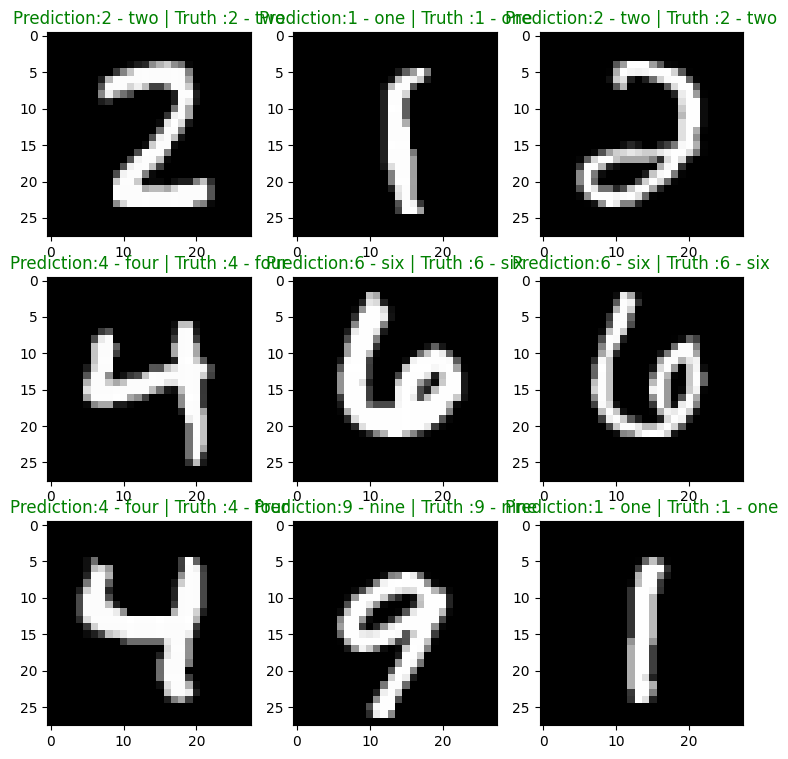

In [ ]:
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i,sample in enumerate(test_samples):
  plt.subplot(nrows,ncols,i+1)
  plt.imshow(sample.squeeze(), cmap="gray")
  pred_label = class_names[pred_labels[i]]
  truth_label = class_names[test_labels[i]]
  title_text = f"Prediction:{pred_label} | Truth :{truth_label}"
  if pred_label==truth_label:
    plt.title(title_text,c="g")
  else:
    plt.title(title_text,c="r")
